# Tools of the Trade

## Python and Jupyter

We discussed in Chapter 2 why we will be using Python and Jupyter in this class and how to get them. A few more notes are worthwhile about Python, and what we will do today is work through an example carefully illustrating some of the tools we will use. Let's use the dataset on house prices.

### Markdown

Before we get started in that, note that one of the big features we get with Jupyter (Notebooks or Labs) is the *Markdown* cells in addition to the *Code* cells. Markdown is a simple language for adding some features to regular text. It is a WYSIWYG (What You See Is What You Get text processing language, unlike say $\LaTeX$ which is a compiled text processing language). The markdown used by Jupyter is identical to that used by Github; and is not far from the markdown language used by wikipedia. Some quick points about using markdown:

- Section headers are identified with '#' symbols. 
- You can add mathematics using dollar symbols enclosing LaTeX commands.  
- Single dollar symbols are for inline mathematics, for example $f(x) = \sin(x^2)$
- Double dollar symbols are for a mathematics environment, for example $$ \int x dx = \frac{1}{2} x^2 + C $$
- For more help with LaTeX, just google things. There are now tools that can take a picture of handwritten mathematics and give you the LaTeX code to creat it.
- Images can be include using a sort of html like tag (see the example notebooks)
- Star symbols are used for italics and two star symbols for bold

You render the markdown code by typing shift+enter in the cell just as you would for executing code in a code cell.

### Python for Data Science

So the best way to learn is to do, so lets start with an example. Many data sets arrive as a comma separated variable (CSV) file. This is a text file representing a spreadsheet where each entry in different columns are separated by a variable. It is worth opening a CSV file in a text editor on your computer and making sure you recognize the structure. If you have received the data as another type of spreadsheet you should open it in its native application and then save it as or export it as a CSV file.

Other common types of data are:
- Images
- Text Files 
- Data scrapped from APIs (like the Twitter API)

If you look at the last example from Chapter 2 you will see an example of working with image files as data, and later in the class we will explore how to handle text and interact with the Twitter API to gather data. 

### Example

#### Import Data

The first thing to do is to load the data into a Python instance from a file. Pandas provides a one-step method 
[pandas.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). 
Note that if your file is using something other than a comma to identify columns you can specify that as an option.

**Warning** we will discuss Big Data later in class, but it is possible for a CSV file to contain too much information for it to be imported like this (depending on your computers RAM).


In [1]:
# Start with importing the pandas package

import pandas as pa

In [2]:
# Consider the following dataset about homes that sold in a city in Iowa

hd = pa.read_csv('Data Sets/house-prices/train.csv')

hd.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


The [pandas.dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) object type is a structured array. It is a collection of rows and columns with names for the rows and colummns. Note there is a special *NaN* character that represents entries that were missing in the dataset. 

Not surprinsingly with the house pricing dataset *PoolQC* (Pool Quality) is a missing value for many houses.

Typically the columns should be the features, and each row should represent one of the samples or instances. We can get a list of the features:


In [3]:
# I wrap it in a list command because it returns an np.array element with some additional information otherwise

list(hd.columns.values)

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

#### Manipulating Data

First, we consider the effect of total square footage on the price of the house. Note that there is no feature that is *Total Square Footage*.  There is *1stFlrSF* and *2ndFlrSF*. So what we want to do is make a new feature that is the sum of these two. However the dataframe itself is big right now, so what I would also like to do is pair it down to only the features I want to consider.


In [7]:
# Make a new data frame using only the '1stFlrSF', '2ndFlrSF', and 'SalePrice' features

hd2 = hd[['1stFlrSF', '2ndFlrSF', 'SalePrice']]
hd2.head()

,1stFlrSF,2ndFlrSF,SalePrice
0,856,854,208500
1,1262,0,181500
2,920,866,223500
3,961,756,140000
4,1145,1053,250000


In [8]:
# Add a new feature by summing the '1stFlrSF' and '2ndFlrSF' features for each house
# new features are added by referencing a subset of the rows with the feature named

# While we are on the subject, I recomend using feature names that do not have spaces and do not start 
# with digits these will behave better in Python overall.

hd2 = hd2.assign(Total_SF=pa.Series(hd2['1stFlrSF'] + hd2['2ndFlrSF'], index=hd2.index))

In [9]:
hd2.head()

,1stFlrSF,2ndFlrSF,SalePrice,Total_SF
0,856,854,208500,1710
1,1262,0,181500,1262
2,920,866,223500,1786
3,961,756,140000,1717
4,1145,1053,250000,2198


**Warning** if you do this the naive Python way (particular if you have used numpy arrays) you probably are getting a *SettingWithCopyWarning*. Using assign is now considered the best method. For more complicated transformations you would probably want to use a lambda or even a regular function.

We will deal with manipulating categorical data later, thouigh you can also look back at the baseball player example in Chapter 1.

#### Exporting Data

Occasionally you will need to export data from Python so that it can be used in other programs. The primary reasons I have to do this in my work are: 

- I need to share the results of some analysis or transformation of the data, like we did here (particularly after using the pandas.groupby() and similar functions). Many people I work with do not use Python and so I need to export the data to a spreadsheet readable format so they can see it.
- I am applying a complicated transformation that has taken some time to compute, and I want to save the result as a starting point for further analysis.

As you can imagine, pandas has a tool for that: 
[pandas.DataFrame.to_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html)


In [54]:
# Note that you need to give a relative path (relative to the directory your notebook is in), 
# or give an absolute path. I work on multiple machines and so relative paths are usually more reliable

hd2.to_csv('total_sf.csv')

#### Plotting

We will use seaborn to plot data. A future class will go through more examples and additional detail about plotting. For now here is an example of a scatter plot we might use with the transformed data for housing prices:


In [58]:
# Import seaborn and matplotlib.pyplot

import seaborn as sn
import matplotlib.pyplot as plt

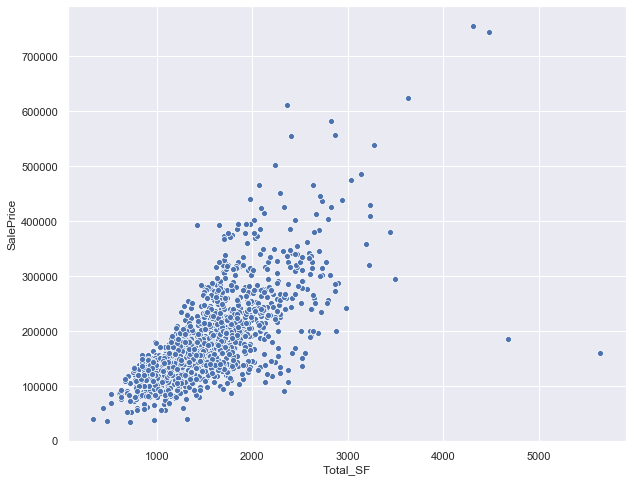

In [59]:
sn.set(style = 'darkgrid')
plt.figure(figsize = (10, 8))

sn.scatterplot(x='Total_SF', y='SalePrice', data=hd2, palette='winter');

#### Making Predictions

So fine we have drawn a nice picture, but what we actually want is to use this model to make predictions. We will use the scikitlearn package. The linear regression command is [sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In order to use this we also need to first convert our pandas DataFrame to a 
[numpy.array](https://docs.scipy.org/doc/numpy/reference/generated/numpy.array.html)



In [62]:
# import the numpy and the Linear Regression tool from scikitlearn

import numpy as np
from sklearn.linear_model import LinearRegression

First we make a numpy.array of the predictor features we want to include in the model. For today that is just the *Total_SF* feature.

Then we make another numpy.array with the known value of the result feature. For today that is the *SalePrice* feature.

In [74]:
X = np.atleast_2d(np.array(hd2['Total_SF'])).transpose() 

# There is an annoying scikitlearn thing here that it needs the X to be a 2-d array;
# In our case the X is a 1-d object.

# I need the transpose because numpy.atleast_2d() gives a (1, n) array and we want a (n, 1) array.

X

array([[1710],
       [1262],
       [1786],
       ...,
       [2340],
       [1078],
       [1256]])

In [75]:
y = np.array(hd2['SalePrice'])

# scikitlearn wants the predictor to be a 1-d array, so no problems.

y

array([208500, 181500, 223500, ..., 266500, 142125, 147500])

In [76]:
reg = LinearRegression().fit(X, y)   # .fit(X, y) applies the model to the X features to predict the y values
                                     # this syntax is identical throughout the scikitlearn functions
reg.score(X, y)

0.5139213494859829

Score here is what is called the $R^2$ of the prediction. It is a measure of the extent to which the regression model we found predicts the data; close to 1 is a good fit. An $R^2$ of 0.514 is not good (which we can see in the graph below).

Later on we will go into further detail about Linear Regression and what $R^2$ means.

In [87]:
b, m = reg.intercept_, *reg.coef_    # The intercept and slope(s) of the regression line can be pulled out

# Also note that I used a little bit of python trickery here to unpack the array reg.coef_

b, m

(15955.120847421553, 109.27661587643645)

The prediction can be found using the scikitlearn builtin; or using the linear form $b + mx = y$

In [94]:
x = 4500

print(reg.predict(np.array(x).reshape(-1, 1))[0])   
# Note a couple of annoying things. The built in expects a 2d array and returns an array.

print(b+m*x)

507699.89229138556
507699.89229138556


We can plot this together with the data.

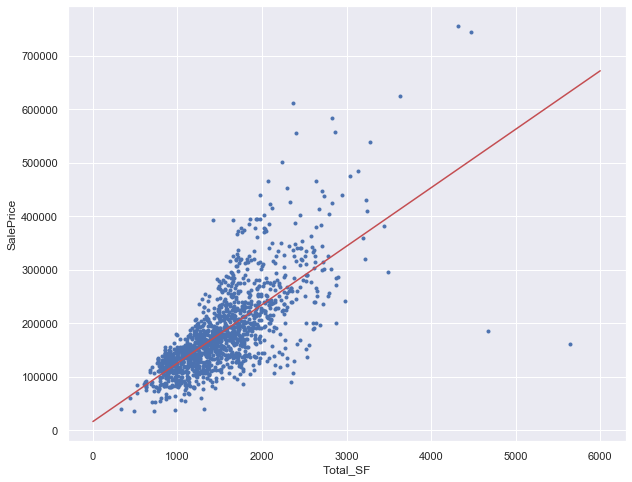

In [101]:
xvalues = np.atleast_2d(np.array(np.linspace(0, 6000, 10))).transpose()   # Build a set of Total_SF values
yvalues = reg.predict(xvalues)  # apply the models predictor

plt.figure(figsize = (10, 8))

plt.plot(X, y, 'b.')  # Plot the points from the dataset
plt.plot(xvalues, yvalues, 'r-');  # plot the regression line

# Note the syntax for the plot function here. It is identical to that of Matlab.

plt.xlabel('Total_SF') # Apply the axis labels
plt.ylabel('SalePrice');

## Development

The data science workflow, which we will spend the next few weeks learning in greater detail, is:

1. Examine the ethics of the question and the data gathering you are about to do;
2. Gather the data following any procedures you have established to address ethical concerns;
3. Make a plan for controling for and estimating error in the model (at a minimum set aside some testing data);
3. Do exploratory data analysis:  Look for missing values, relationships between features, or clustering;
4. Determine the question to be asked (what feature is the result and what features could be predictors);
5. Develop the model;
6. Once the final model is chosen and ready, apply it to your testing data and discuss the results;
7. Take a step back and ask if you have missed anything that might make your conclusions or your error estimate invalid or unethical;
8. Make the decision to move the model into production/presentation or not.



Note that if we were to break step 6 into pieces, it would looke a little similar to the whole cycle. In fact you would probably take additional test sets out of the data as you explore different models. Your goal is to already have a sense of what the error will be as you head into the final testing phase in step 7.

**Warning** Failing to take appropriate precautions to estimate the error of the model, or adjusting your model after you have used the test data can lead to overfiting. Your model will look better on the data you have, but when you put it into production it may behave poorly.

## Versioning Control

A major part of any work using significant computing software like Data Science, is versioning control. Projects are usually done by a team and usually run through multiple stages of development before their final production or presentation steps. This means a challenge of the work is keeping track of what changes have been made, providing a system for changes to be vetted by the team, having a way to keep track of and resolve conflicts between versions, and possibly creating different versions that evolve independently.

Add to this that for many employers their datascience (or mathematics, engineering, or programing) teams may be spread out around the country or the world. So we need to keep track of versions, but we also need to be able to distribute them.

All of this means that we need to learn how to do what is called *versioning control*. 

1. The absolute simplest versioning control is to add numbers/names incrementally to the file names. The files can then be shared by email or a file sharing service. Problem: once two people on a team have made changes how do we resolve and incorporate the changes? At the least we need to set a standard for how the file names are choosen. We need to keep each file to preserve the history. It is also tough for the two people to be working on different parts of the project at the same time.

2. Some file sharing service (Google, Dropbox, and Outlook) will keep track of the history of a file. However they do not provide a system for resolving conflicts between versions, and often conflcited versions will spawn new copies of a file.

3. The Industry Standard for Versioning Control is Git (though there are other similar programs out there). A highly used service that is integrated with Git is [Github](http://github.com). 

### Git

Git keeps track of the history of a project. It does this by tracking differences in the versions for each file in the project (rather than making new copies of the whole file).

It provides a formal structure for negotiating conflicts between versions, and for creating new versions.

Using a service like Github it also allows for easy distribution of the project.

The downside of Git is that it is very formal. It is capable of managing large projects like the 
[Linux kernel](https://github.com/torvalds/linux) with so many users making changes that github has given up trying to count them, and the only way to do that is with formality. That means it is possible to get into a frustrating situation where Git will not let you do what you want to do. We will talk about how to avoid this, and some options for what to do when it happens.

Ultimately I am asking you to use Git and Github for this class because the employers I have talked to in Data Science, Mathematics, and Statistics have said that a candidate with experience using Git will have an advantage when interviewing with them. At the end of the day, understanding how to use Git will make you a better member of any team, however they do Versioning Control. 

### Using Github/Git with your Team

Github now comes with a desktop application that provides some help for working with it. To get started someone from your team should do the following:

- Create an account on Github.
- Under the *Repositories* tab, click the **New** button.
- Enter a name for your respository (no spaces), choose *Private*, and click the **Create Repository** button. Note that there are other options here. We can discuss them in class if you are interested.
- Click the **Set up in Desktop** button, it should prompt you to install the Github Desktop App if you have not already, and it should then prompt you to open the Desktop App.
- In the Desktop App that is now open choose the directory where you want your project on your computer (note, not the directory it is currently in; I suggest keeping all of your Github projects in a Github directory), and click the **Clone** button.
- If you open that directory on your computer you will see that it is empty. Add a text file to it.
- Go back to the Github Desktop App, and you will see that it has now noticed you made a change in this directory. Because we changed a textfile it even gives us a little preview of what we changed.
- Right now the change is not incorporated as part of the history of the project, we make it part of the history by adding a description of what we changed and clicking the **Commit to master** button.
- The change is now part of the history of the project, but only on our local machine. We need to *Publish* the first branch of our project and *Push* the changes in it to Github so others can see them.
- Now make another change to the file. When you go back to the Github Desktop App, it has noticed your change. Click the **Commit to master** button to make the change part of the history (or you can right click on the file and choose *Discard Changes* to drop them; or for a textfile you can even select which changes you want to keep and which you want to discard).
- Then *Push* those changes to Github.

Going back to the website and reloading the page, you will see your file is now in the *Code* tab. To add the rest of your team to the project, under the *Settings* tab choose the *Collaborators* page. Enter the user names of each of your three teammates. Note this is one reason our teams are limited to 3-4 people; in order to have more collaborators on a project you need to have it be public. Note that there is an alternative process for public respositories to collaborators called *Forking*. This lets you work on the code for someone elses project without explicitly having their permission, you would just need their permission if you want your changes to be incorporated into the project.

Your teammates will then need to go to the Github website, login, and then *Clone* the repository to their local machine.


### Git Glossary

*Branch:* a part of the project that is currently being developed on its own. **Suggestion:** when you are working on a new component of your project, or when you are working independently of your team, do it in a branch. Two people working separately on the same branch is one of the main ways that conflicts will happen.

*Commit:* when changes are added by you to the current branch. Note if you change branches, changes you have made that are not committed are lost. Basically a commit represents a point in the history for the current branch that you want to record.

*Conflicts:* conflicts occur when changes have been made separately from the same commit. Once git sees a conflict, commits of the conflicted files cannot be made until they have been resolved. Resolving a conflict is done either by undoing one of the commits or by using a text editor to decide which changes to keep or remove. You may have to use a command line interface (Jupyter has one) in order to fix this.

Save yourself some grief and try to avoid conflicts by always working in a development branch.

*Current Branch:* This is the branch your local machine has you working on. Note when you switch branches and do a fetch, your directory is updated to match the head of the branch (changes you have made but not committed are lost).

*Fetch:* a fetch checks for new commits to the current branch from the Github repository and downloads or uploads them them.

*Fork:* a fork is a copy of a public project by a non-collaborator or a copy of the project with an intent of making a major change.

*Merge:* a merge combines two branches following a pull request. Usually this will be a development branch into *master*. 

**Suggestion:** Merges will result in conflicts if the branch being merged started from an earlier commit of the one being merged into. So development should happen in branches other than master. You can always abandon a branch.

*Pull:* a pull request is a request that essentially asks other collaborators on a project to review the branch. It can be followed by further commits, and ends in a either a merge or a close. (well not entirely, it is possible to take some changes but not all of them).

*Publish:* send a new local branch to Github. This makes the branch accessible to the rest of your team. I suggest Publishing your development branches and doing frequent commits and fetches of them 

*Push:* a push sends the commits on your current branch to Github (that have not been sent already). Effectively it publishes what you have done so that a teammate following your branch can then fetch them and see what you have changed.

### Suggestions

So the suggestion for you and your team is to take this class as an opportunity to learn how to use Git and Github. However it is definitely possible to get into a situation where the formality of Git brings things to a halt. 

1. Frequently make a copy of the files and save it somewhere else on your local machine so you have a place to get back to.
2. Use development branches to try and avoid conflicts when merging with master. This means after a merge you probably want to abandon other branches unless they were modifying files that were not part of the merge.
3. Which means using separate files is a good idea too.
4. Done right Git gives you: a history of your project including developments that were abandoned and an easy way to share your work with each other.

